# Sampling Sine Waves to guarantee minimum sampling for each frequency

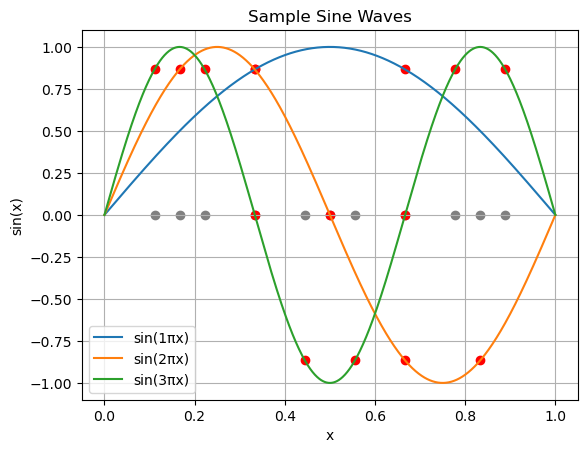

Sorted sample points:
 [0.11111, 0.16667, 0.22222, 0.33333, 0.44444, 0.5, 0.55556, 0.66667, 0.77778, 0.83333, 0.88889]


In [4]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt


def sample_sine_wave(freqs: List[int], k: int) -> List[float]:
    all_sample_points = set()
    for f in freqs:
        new_points = np.linspace(0, 1, f * k + 1)
        all_sample_points.update(set(new_points.tolist()))
    return sorted(list(all_sample_points - {0, 1}))


def is_near_integer(num: float, tolerance: float = 1e-9) -> bool:
    return abs(num - round(num)) < tolerance


def select_near_integers(numbers: list, tolerance: float = 1e-9) -> list:
    return [num for num in numbers if is_near_integer(num, tolerance)]


def plot_samples(samples: np.ndarray, freqs: List[int], k: int):

    plt.scatter(samples, samples * 0, color='grey')

    for f in freqs:
        x = np.linspace(0, 1, 1000)
        y = np.sin(f * np.pi * x)

        plt.plot(x, y, label=f'sin({f}πx)')
        samples_for_freq = np.array(
            select_near_integers((samples * f * k).tolist())
        ) / (f * k)
        plt.scatter(samples_for_freq, np.sin(np.pi * f * samples_for_freq), color='red')

    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.title('Sample Sine Waves')
    plt.grid()
    plt.show()


if __name__ == "__main__":
    # Example usage
    freqs = [1,2,3]  # List of sine frequencies
    k = 3  # Number of points per segment

    samples = sample_sine_wave(freqs, k)
    plot_samples(np.array(samples), freqs, k)
    print(f"Sorted sample points:\n {[np.round(x, 5) for x in samples]}")